In [1]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("glmnet")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp2dawdP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp2dawdP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp2dawdP/downloaded_packages


In [2]:
library(dplyr)
library(glmnet)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loaded glmnet 4.1-8



# Import and format data

In [3]:
#read in the data
data <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/regression_tables/fieldwork_regression_table.csv")
data$scaled_score <- (data$score_min -1)/4
data$logistic_transformed_score <-  1 / (1 + exp(-data$scaled_score))
trim_data <- data %>% select(-identifier,-score_min, - scaled_score,  -serviceable_agg, -score_ellen, -score_aadya, -serviceable_ellen, -serviceable_aadya)

# Build a model

In [4]:
model <- lm(logistic_transformed_score ~ ., data = trim_data)
fit_aic <- step(model)
summary(fit_aic)

Start:  AIC=-564.46
logistic_transformed_score ~ IT01V_packetsRecieved_ellen + IT01V_packetsRecieved_aadya + 
    IT01V_packetsLost_ellen + IT01V_packetsLost_aadya + IT01V_frameWidth_ellen + 
    IT01V_frameWidth_aadya + IT01V_frameHeight_ellen + IT01V_frameHeight_aadya + 
    IT01V_totalFreezesDuration_ellen + IT01V_totalFreezesDuration_aadya + 
    IT01V_framesPerSecond_ellen + IT01V_framesPerSecond_aadya + 
    IT01V_bytesReceived_in_bits_s_ellen + IT01V_bytesReceived_in_bits_s_aadya + 
    IT01V_totalProcessingDelay_ellen + IT01V_totalProcessingDelay_aadya + 
    IT01V_jitter_ellen + IT01V_jitter_aadya + IT01V_jitterBufferDelay_emissions_ellen + 
    IT01V_jitterBufferDelay_emissions_aadya + IT01A_bytesReceived_in_bits_s_ellen + 
    IT01A_bytesReceived_in_bits_s_aadya + IT01A_jitterBufferDelay_emissions_ellen + 
    IT01A_jitterBufferDelay_emissions_aadya + OT01V_packetsSent_s_ellen + 
    OT01V_packetsSent_s_aadya + OT01V_bytesSent_in_bits_s_ellen + 
    OT01V_bytesSent_in_bits_s


Call:
lm(formula = logistic_transformed_score ~ IT01V_packetsLost_aadya + 
    IT01V_framesPerSecond_ellen + IT01V_framesPerSecond_aadya + 
    IT01V_totalProcessingDelay_ellen + IT01V_totalProcessingDelay_aadya + 
    IT01V_jitterBufferDelay_emissions_ellen + IT01A_jitterBufferDelay_emissions_ellen + 
    IT01A_jitterBufferDelay_emissions_aadya + OT01V_packetsSent_s_ellen + 
    OT01V_bytesSent_in_bits_s_ellen + OT01V_framesPerSecond_ellen + 
    OT01V_framesPerSecond_aadya + OT01V_totalPacketSendDelay_ellen + 
    RIV_roundTripTime_aadya + RIV_fractionLost_ellen + RIA_fractionLost_aadya + 
    RIA_roundTripTime_aadya + AP_totalPlayoutDelay_ellen, data = trim_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07130 -0.01663  0.00031  0.01897  0.07109 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              7.432e-01  6.972e-02  10.660  < 2e-16
IT01V_packetsLost_aadya                  1.838e

# import data

In [5]:
stage_1 <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/regression_tables/stage_1_regression_table.csv")
stage_2 <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/regression_tables/stage_2_regression_table.csv")
stage_3 <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/regression_tables/stage_3_regression_table.csv")

# infer values

In [6]:
predicted_scores_1 <- predict(fit_aic, newdata = stage_1)
stage_1$score <- predicted_scores_1
predicted_scores_2 <- predict(fit_aic, newdata = stage_2)
stage_2$score <- predicted_scores_2
predicted_scores_3 <- predict(fit_aic, newdata = stage_3)
stage_3$score <- predicted_scores_3

# model of inferred score to up/down/rtt

In [9]:
new_model1 <- lm(score ~ log(Upload) + log(Download) + Latency, data = stage_1)
new_model2 <- lm(score ~ log(Upload) + log(Download) + Latency, data = stage_2)
new_model3 <- lm(score ~ log(Upload_x) + log(Download_x) + Latency_x + log(Upload_y) + log(Download_y) + Latency_y, data = stage_3)

In [22]:
summary(new_model1)
summary(new_model2)
summary(new_model3)

calculate_mse <- function(stage, model) {
    predictions <- predict(model, stage)
    mse <- mean((stage$score - predictions)^2)
    stage_name <- deparse(substitute(stage))
    return(paste(stage_name, mse, sep= " "))
}
calculate_mse(stage_1, new_model1)
calculate_mse(stage_2, new_model2)
calculate_mse(stage_3, new_model3)


Call:
lm(formula = score ~ log(Upload) + log(Download) + Latency, data = stage_1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.162349 -0.010435  0.001847  0.014808  0.112753 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.045e-01  1.688e-02  29.886   <2e-16 ***
log(Upload)    1.426e-02  1.171e-03  12.179   <2e-16 ***
log(Download) -1.482e-03  1.471e-03  -1.007    0.315    
Latency       -1.020e-04  7.384e-06 -13.811   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02897 on 295 degrees of freedom
Multiple R-squared:  0.5349,	Adjusted R-squared:  0.5301 
F-statistic: 113.1 on 3 and 295 DF,  p-value: < 2.2e-16



Call:
lm(formula = score ~ log(Upload) + log(Download) + Latency, data = stage_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.83122 -0.01985  0.01663  0.04326  0.19035 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.948e-01  5.773e-02   6.838  4.8e-11 ***
log(Upload)    3.804e-02  4.010e-03   9.485  < 2e-16 ***
log(Download) -1.297e-02  5.019e-03  -2.584  0.01027 *  
Latency       -7.303e-05  2.512e-05  -2.907  0.00394 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09777 on 288 degrees of freedom
Multiple R-squared:  0.2672,	Adjusted R-squared:  0.2596 
F-statistic:    35 on 3 and 288 DF,  p-value: < 2.2e-16



Call:
lm(formula = score ~ log(Upload_x) + log(Download_x) + Latency_x + 
    log(Upload_y) + log(Download_y) + Latency_y, data = stage_3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.307916 -0.015784  0.007391  0.024607  0.112650 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.867e-01  3.531e-02  16.614  < 2e-16 ***
log(Upload_x)    1.695e-03  1.801e-03   0.941    0.348    
log(Download_x) -2.551e-03  2.252e-03  -1.133    0.258    
Latency_x       -6.072e-05  1.156e-05  -5.251 2.96e-07 ***
log(Upload_y)    9.237e-03  1.814e-03   5.092 6.42e-07 ***
log(Download_y) -3.107e-03  2.263e-03  -1.373    0.171    
Latency_y       -5.983e-05  1.156e-05  -5.175 4.31e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04396 on 286 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1857 
F-statistic:  12.1 on 6 and 286 DF,  p-value: 4.066e-12


[1] "stage_1 0.000828049102429206"

[1] "stage_2 0.00731380469868047"

[1] "stage_3 0.00188638002554757"

# undo the logistic transform

In [23]:
transform_scores <- function(stage_data) {
  #ensure strictly between 0 and 1 to avoid undefined
  stage_data$score <- pmax(pmin(stage_data$score, 0.999), 0.001) 
  #apply logit transform to put back into normalised score form
  stage_data$real_score <-log(stage_data$score / (1 - stage_data$score))
  #then scale back up to 1-5
  stage_data$real_score_multiplied <- ((stage_data$real_score * 4) + 1)
  return(stage_data)
}
stage_1 <- transform_scores(stage_1)
stage_2 <- transform_scores(stage_2)
stage_3 <- transform_scores(stage_3)

# add a binary column that defines serviceability

In [24]:
create_binary_grouping <- function(stage_data) {
  stage_data$binary_col <- ifelse(stage_data$real_score_multiplied < 3, 0, 1)
  
  unserv_0 <- subset(stage_data, binary_col == 0)
  serv_1 <- subset(stage_data, binary_col == 1)
  
  unserv_0$group <- paste("UNSERV")
  serv_1$group <- paste("SERV")
  
  combined_data <- rbind(unserv_0, serv_1)
  return(combined_data)
}
#execute for each stage
combined_data1 <- create_binary_grouping(stage_1)
combined_data2 <- create_binary_grouping(stage_2)
combined_data3 <- create_binary_grouping(stage_3)

In [25]:
#show distribution of 0s and 1s
table(combined_data1$binary_col)
table(combined_data2$binary_col)
table(combined_data3$binary_col)


  0   1 
295   4 


  0   1 
263  29 


  0   1 
270  23 

In [26]:
install.packages("plotly")
install.packages("dplyr")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOeKCeA/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOeKCeA/downloaded_packages


# create factors for up and latency

In [27]:
upload_levels <- c(0.5, 1, 5, 20)    
download_levels <- c(2, 5, 12, 25, 50) 
latency_levels <- c(100, 250, 400, 550, 750)


create_factors <- function(data) {
    data$Upload <- data$Upload / 1000    # Divide Upload by 1000
    data$Download <- data$Download / 1000  # Divide Download by 1000
    
    data$Upload_Factor <- factor(data$Upload, levels = upload_levels)
    data$Download_Factor <- factor(data$Download, levels = download_levels)
    data$Latency_Factor <- factor(data$Latency, levels = latency_levels)
  
    return(data)
}

# Apply the updated function
combined_data1 <- create_factors(combined_data1)
combined_data2 <- create_factors(combined_data2)

create_factors3 <- function(data) {
    data$Upload_x <- data$Upload_x / 1000
    data$Upload_y <- data$Upload_y / 1000
    data$Download_x <- data$Download_x / 1000
    data$Download_y <- data$Download_y / 1000

    data$Upload_Factor_x <- factor(data$Upload_x, levels = upload_levels)
    data$Upload_Factor_y <- factor(data$Upload_y, levels = upload_levels)
    data$Latency_Factor_x <- factor(data$Latency_x, levels = latency_levels)
    data$Latency_Factor_y <- factor(data$Latency_y, levels = latency_levels)
    data$Download_Factor_x <- factor(data$Download_x, levels = download_levels)
    data$Download_Factor_y <- factor(data$Download_y, levels = download_levels)
  return(data)
}
combined_data3 <- create_factors3(combined_data3)


# Heat map

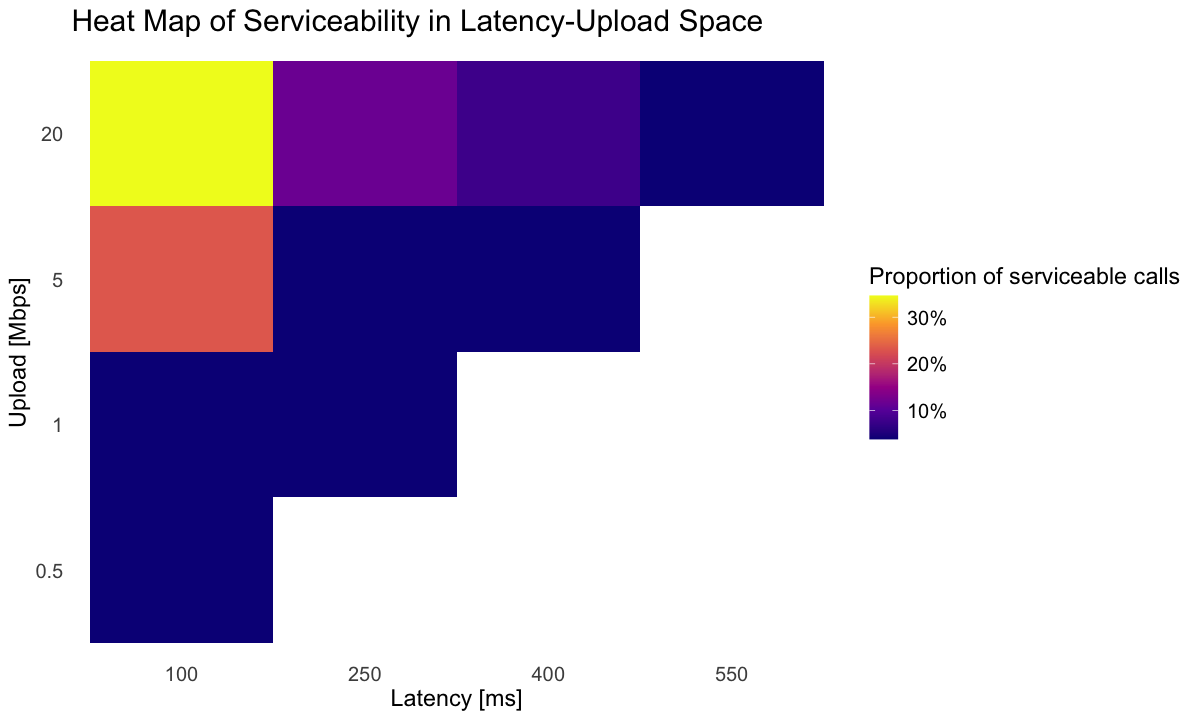

In [28]:
serv2 <-subset(combined_data2,binary_col == 1)
serv3 <- subset(combined_data3,binary_col == 1)
serv2 <- subset(serv2, Latency != 750)
#serv2_wi <- subset(serv2, Latency ==750)
library(ggplot2)
total_points <- nrow(serv2)

ggplot(data = serv2, aes(x = Latency_Factor, y = Upload_Factor)) +
    stat_bin2d(bins = 30, aes(fill = ..count../total_points)) +  # Calculate proportion
    scale_fill_viridis_c(option = "plasma", labels = scales::percent) +  # Display as percentages
    labs(title = "Heat Map of Serviceability in Latency-Upload Space",
         x = "Latency [ms]",                       
         y = "Upload [Mbps]",              
         fill = "Proportion of serviceable calls") +                    # Legend title showing proportion
    theme_minimal() +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          plot.title = element_text(size = 18),   # Increase title size
          axis.title.x = element_text(size = 14), # Increase x-axis label size
          axis.title.y = element_text(size = 14), # Increase y-axis label size
          legend.title = element_text(size = 14), # Increase legend title size
          legend.text = element_text(size = 12),  # Increase legend text size
          axis.text = element_text(size = 12))    # Increase axis text size



# visualise Stages 1 and 2

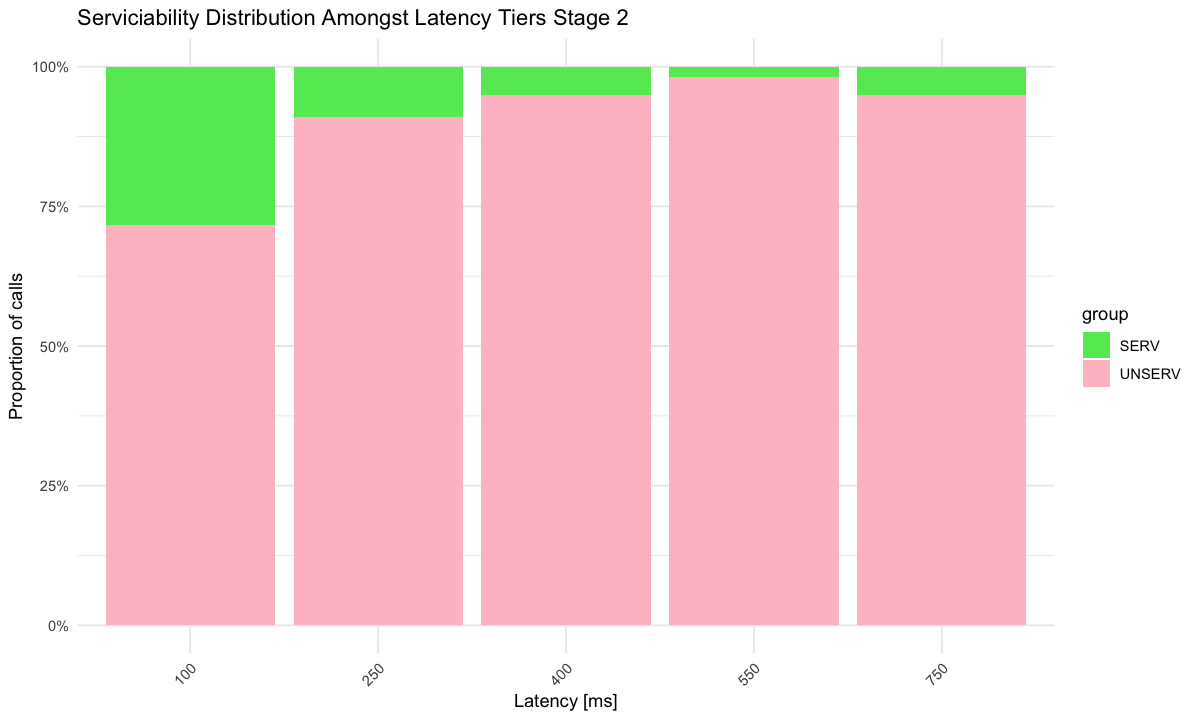

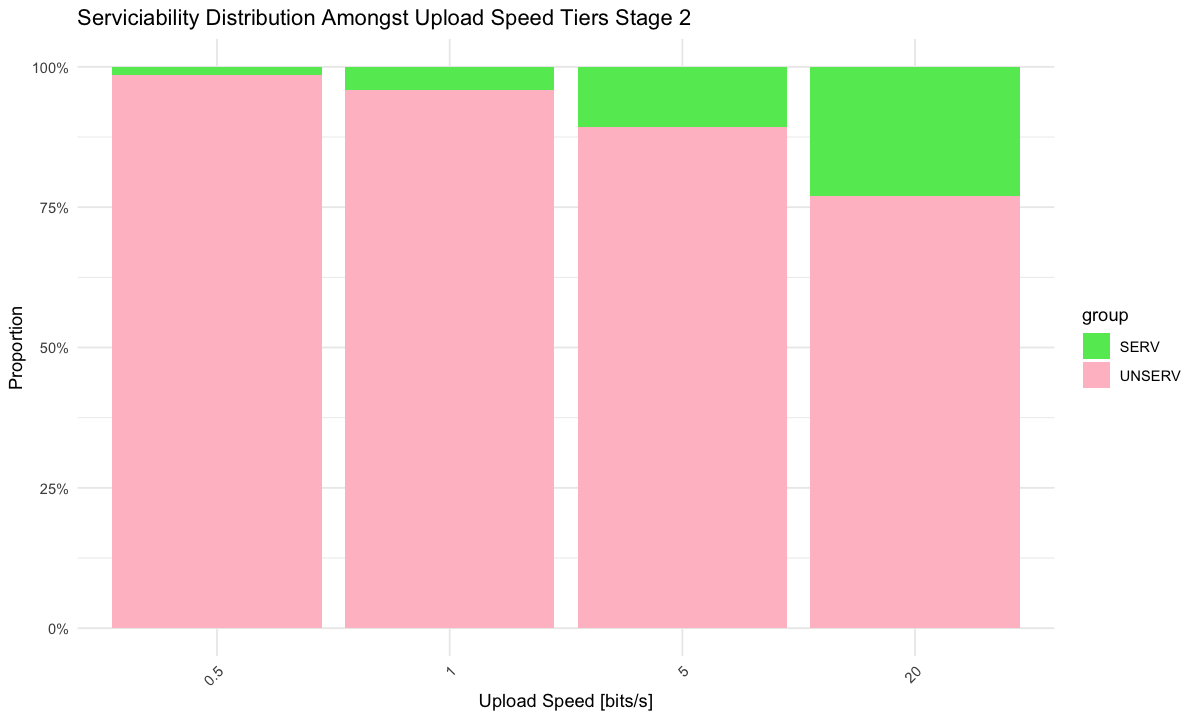

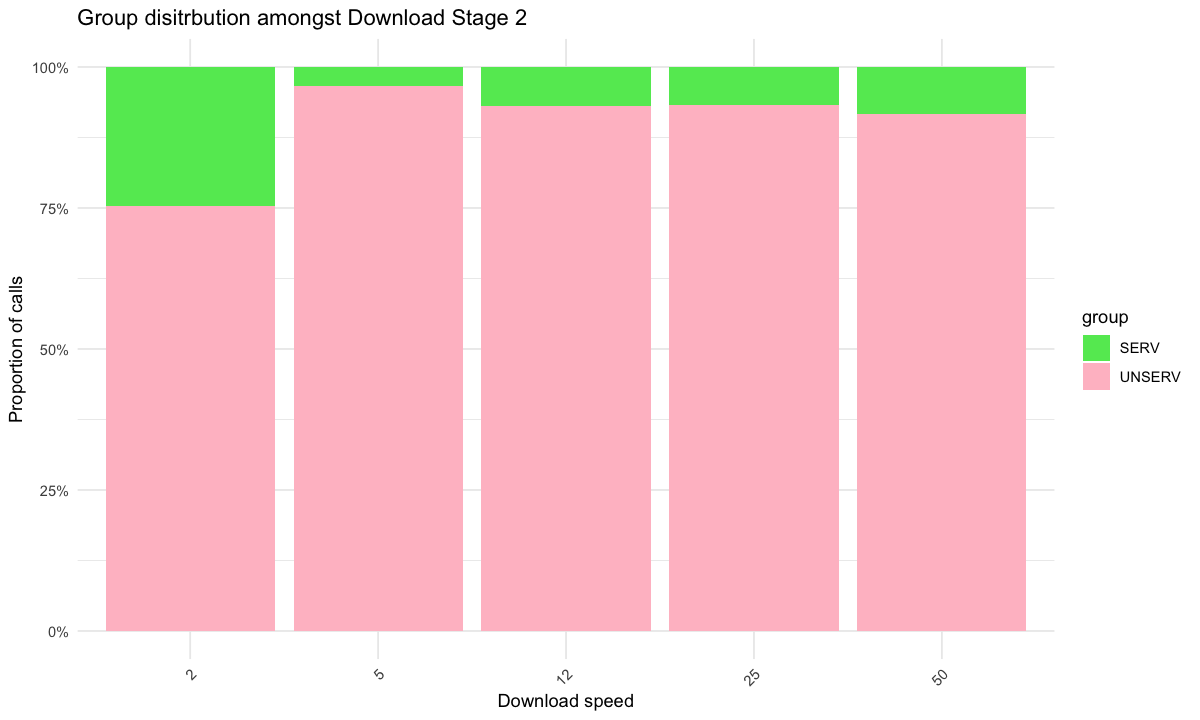

In [29]:
library(ggplot2)

plot_grouped_stacked_bars <- function(data, stage_name) {
  custom_colors <- c("UNSERV" = "pink", "SERV" = "#61e861")
  options(repr.plot.width = 10, repr.plot.height = 6)

  # Plot for Latency Factor
  p1 <- ggplot(data, aes(x = Latency_Factor, fill = group)) +
    geom_bar(position = "fill") +  # Stacked bar with proportions
    labs(title = paste("Serviciability Distribution Amongst Latency Tiers", stage_name),
         x = "Latency [ms]",
         y = "Proportion of calls") +
    scale_y_continuous(labels = scales::percent) +  # Format y-axis as percentage
    scale_fill_manual(values = custom_colors) + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

  # Plot for Upload Factor
  p2 <- ggplot(data, aes(x = Upload_Factor, fill = group)) +
    geom_bar(position = "fill") +  # Stacked bar with proportions
    labs(title = paste("Serviciability Distribution Amongst Upload Speed Tiers", stage_name),
         x = "Upload Speed [bits/s]",
         y = "Proportion") +
    scale_y_continuous(labels = scales::percent) +
    scale_fill_manual(values = custom_colors) + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  #download
  p3 <- ggplot(data, aes(x = Download_Factor, fill = group)) +
    geom_bar(position = "fill") +  # Stacked bar with proportions
    labs(title = paste("Group disitrbution amongst Download", stage_name),
         x = "Download speed",
         y = "Proportion of calls") +
    scale_y_continuous(labels = scales::percent) +  # Format y-axis as percentage
    scale_fill_manual(values = custom_colors) + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

  return(list(latency_plot = p1, upload_plot = p2, download_plot =p3))
}

#make plots
plots_stage_1 <- plot_grouped_stacked_bars(combined_data1, "Stage 1")
plots_stage_2 <- plot_grouped_stacked_bars(combined_data2, "Stage 2")

#print plots
# print(plots_stage_1$latency_plot)
# print(plots_stage_1$upload_plot)

print(plots_stage_2$latency_plot)
print(plots_stage_2$upload_plot)
print(plots_stage_2$download_plot)

# Visualise Stage 3

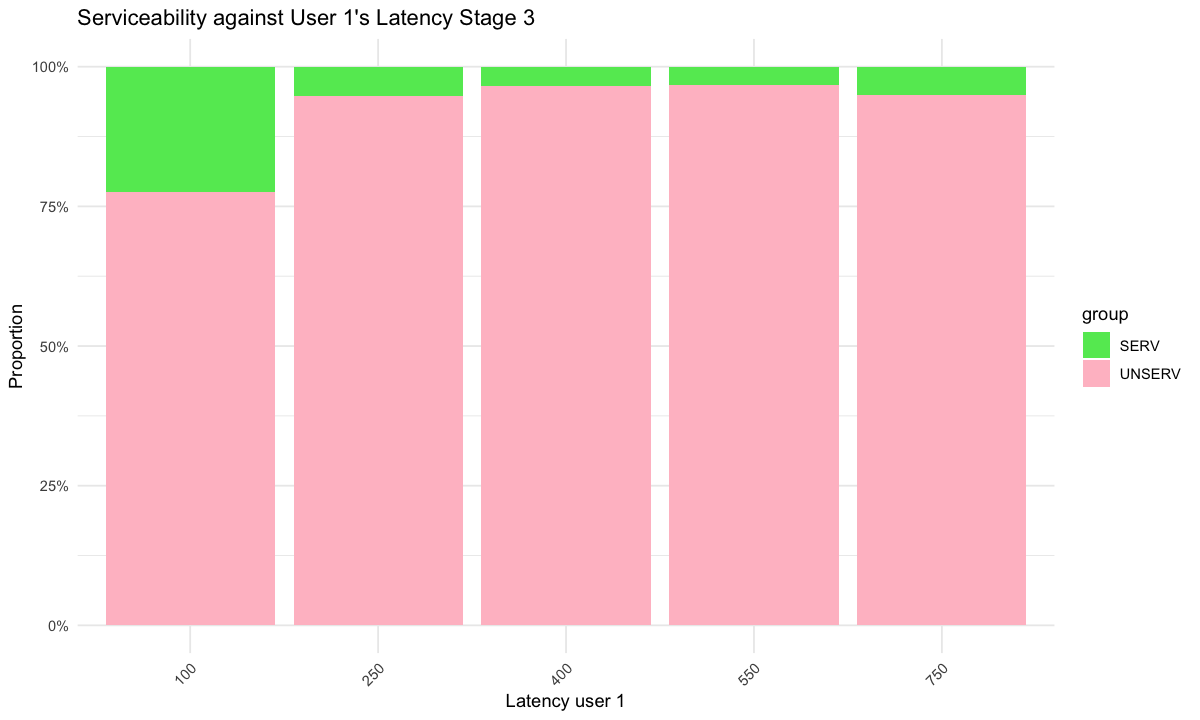

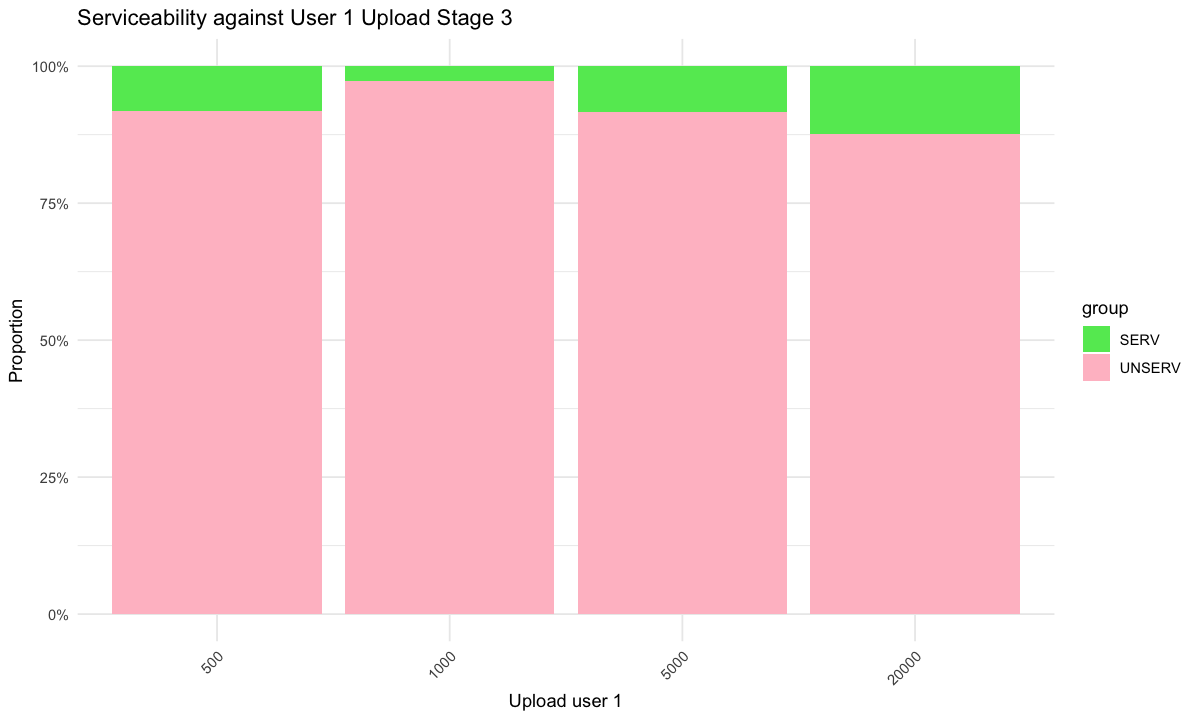

In [64]:
library(ggplot2)

plot_stage_3 <- function(data, stage_name) {
  custom_colors <- c("UNSERV" = "pink", "SERV" = "#61e861")
  options(repr.plot.width = 10, repr.plot.height = 6)

  # Plot for Latency Factor
  p1 <- ggplot(data, aes(x = Latency_Factor_x, fill = group)) +
    geom_bar(position = "fill") +  # Stacked bar with proportions
    labs(title = paste("Serviceability against User 1's Latency", stage_name),
         x = "Latency user 1",
         y = "Proportion") +
    scale_y_continuous(labels = scales::percent) +  # Format y-axis as percentage
    scale_fill_manual(values = custom_colors) + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

p2 <- ggplot(data, aes(x = Latency_Factor_y, fill = group)) +
    geom_bar(position = "fill") +  # Stacked bar with proportions
    labs(title = paste("Serviceability against User 2's Latency", stage_name),
         x = "Latency user 2",
         y = "Proportion") +
    scale_y_continuous(labels = scales::percent) +  # Format y-axis as percentage
    scale_fill_manual(values = custom_colors) + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 


  # Plot for Upload Factor
  p3 <- ggplot(data, aes(x = Upload_Factor_x, fill = group)) +
    geom_bar(position = "fill") +  # Stacked bar with proportions
    labs(title = paste("Serviceability against User 1 Upload", stage_name),
         x = "Upload user 1",
         y = "Proportion") +
    scale_y_continuous(labels = scales::percent) +
    scale_fill_manual(values = custom_colors) + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  p4 <- ggplot(data, aes(x = Upload_Factor_y, fill = group)) +
    geom_bar(position = "fill") +  # Stacked bar with proportions
    labs(title = paste("Serviceability against User 2 Upload", stage_name),
         x = "Upload user 2",
         y = "Proportion") +
    scale_y_continuous(labels = scales::percent) +
    scale_fill_manual(values = custom_colors) + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  return(list(latency_plot_x = p1,latency_plot_y = p2, upload_plot_x = p3, upload_plot_y = p4))
}

#make plots
plots_stage_3 <- plot_stage_3(combined_data3, "Stage 3")
print(plots_stage_3$latency_plot_x)
#print(plots_stage_3$latency_plot_y)
print(plots_stage_3$upload_plot_x)
#print(plots_stage_3$upload_plot_y)